In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load in the data

feast=pd.read_csv('data/mr_feast_views.csv')

feast.drop_duplicates(inplace = True)

feast.head()

,video_id,category,views,days_since_release,License,views_change
0,VG916,Reaction,2108373.0,27,NaN,2108373.0
2,VG916,Reaction,2543481.0,28,NaN,435108.0
3,VG916,Reaction,3084828.0,29,NaN,541347.0
4,VG916,Reaction,3784331.0,30,NaN,699503.0
5,VG916,Reaction,3850877.0,31,NaN,66546.0


### Which category of video has the largest number of views?

In [60]:
feast.groupby('category').sum(numeric_only = True)[['views']].sort_values('views', ascending = False)

# Group by category column, sum the numeric columns within each group/category,
# filter to just the views column, and sort the values by descending

,views
category,
Reaction,592624667.0
Challenge,237152538.0
Vlog,11368823.0
Advert,2011739.0


### For reaction videos, after how many days is the standard deviation on the daily views the lowest?

In [61]:
# pull out the unique days_since_release values and store them in a list, so we have a list
# of all the day values in the dataset
days = list(feast.days_since_release.unique())

# create an empty dictionary to store our standard deviation results in when we calculate them
results = {}

# loop through each day value in the days list
for day in days:

    # filter the data for day values less than our current loop, then calculate the standard deviation
    data = feast[feast.days_since_release < day]['views_change'].std() 
    # store that value in the results dictionary, with the day value as key and std as value
    results[day] = data

# sort the results dictionary by the values to find the smallest std and the day it occurred
dict(sorted(results.items(), key = lambda result: result[1]))

# note that the answer can be 10 or 36 days depending on if duplicate rows
# are dropped from the dataset before running this code!

{36: 588530.8578639374,
 35: 588964.6598387709,
 34: 590943.20033652,
 33: 594058.1367380078,
 10: 595162.8892549222,
 32: 597684.6829443887,
 26: 600599.401650097,
 31: 602287.9888019742,
 27: 602927.0602651412,
 19: 606494.9039780239,
 28: 607298.2945570565,
 24: 607852.6994870766,
 9: 608271.4919110985,
 25: 608529.8076096586,
 30: 608797.2845457863,
 29: 615005.668788216,
 23: 616564.2265532737,
 2: 618417.85230181,
 11: 623872.3816410514,
 17: 624078.0024071235,
 18: 624233.8222802888,
 22: 626757.2877872838,
 12: 628676.6282896764,
 8: 629529.3038439348,
 20: 629922.5928074634,
 21: 639360.07846594,
 16: 647605.1238941216,
 15: 653705.7711452085,
 1: nan,
 7: 660873.0466215248,
 6: 664788.372549355,
 14: 673664.306153794,
 13: 690764.5719521757,
 4: 711791.7078941425,
 5: 717062.9773486297,
 3: 818475.8521983,
 0: nan}

### How many vlog videos have a maximum daily number of views, greater than the lowest viewed reaction video’s maximum daily number of views?

In [82]:
# filter the data to just Vlog or Reaction videos

vlogs = feast[feast.category == 'Vlog']
reactions = feast[feast.category == 'Reaction']

array(['OD453', 'MO720'], dtype=object)

In [76]:
# find the reaction video with the lowest total number of views regardless of days since upload

reactions.groupby('video_id')[['views_change']].sum().sort_values('views_change').head()

# video_id JA888

,views_change
video_id,
JA888,2510174.0
MV637,2533161.0
PC922,2548806.0
GR303,2673275.0
CT573,2689623.0


In [77]:
# find MO720's maximum daily number of views

ja888_max = vlogs[vlogs.video_id == 'JA888'].views_change.max()

In [85]:
# count number of vlogs with max daily views greater than ja888

vlogs_maxs = vlogs.groupby('video_id')[['views_change']].max(numeric_only = True).copy()

vlogs_maxs[vlogs_maxs.views_change > ja888_max]

# None!


,views_change
video_id,


### What is the distribution skew of total views of videos that are older than 10 days?

In [96]:
# filter for videos older than 10 days
# and find their total views

old_vids = feast[feast.days_since_release > 10].groupby('video_id').max('views').copy()
old_vids.reset_index(inplace=True)
old_vids.head()

,video_id,views,days_since_release,License,views_change
0,AJ152,25603.0,29,NaN,23423.0
1,AK102,28266.0,19,NaN,26294.0
2,BB297,2801937.0,33,NaN,1427167.0
3,BB342,2844732.0,16,NaN,513978.0
4,BV474,3808133.0,21,NaN,1959543.0


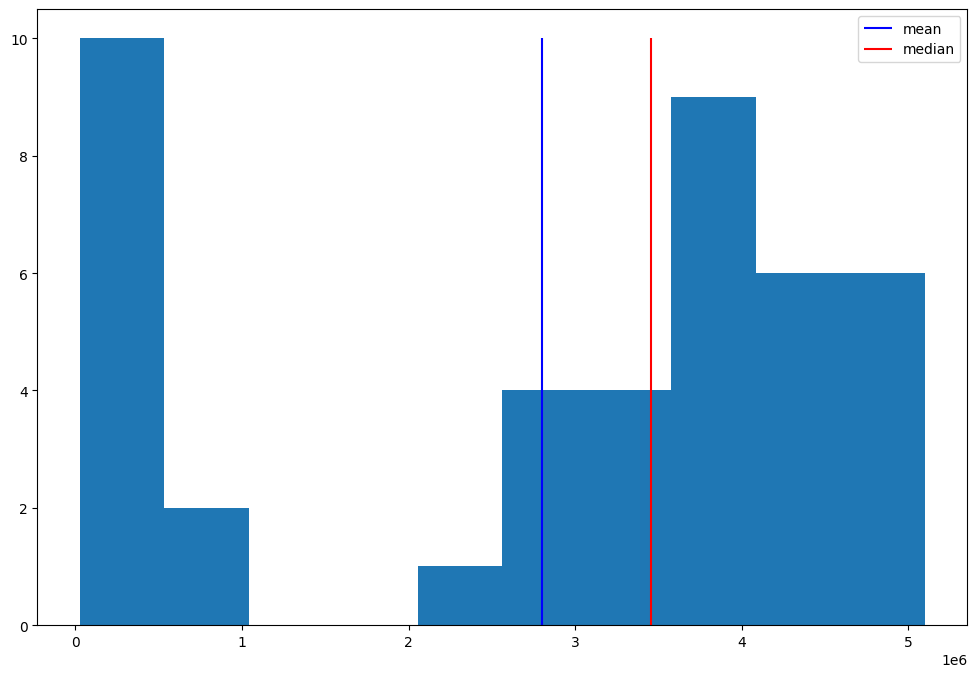

In [104]:
# plot

fig, ax = plt.subplots(figsize = (12, 8))

ax.hist(old_vids.views)
ax.vlines(x=old_vids.views.mean(), ymin=0, ymax=10, color='b', label='mean')
ax.vlines(x=old_vids.views.median(), ymin=0, ymax=10, color='r', label='median')
ax.legend();

# positive as median is higher than mean

### Mr Feast claims that 20% of challenge videos have greater daily views on day 20 than day 21, test his claim at the 5% level.

In [110]:
# filter for challenge videos from either day 20 or day 21

challenges = feast[(feast.category == 'Challenge') & ((feast.days_since_release == 20) | (feast.days_since_release == 21))].copy()

challenges.head()

,video_id,category,views,days_since_release,License,views_change
67,HV246,Challenge,2946325.0,20,NaN,590523.0
68,HV246,Challenge,3822553.0,21,NaN,876228.0
88,ON360,Challenge,2762610.0,20,NaN,555145.0
89,ON360,Challenge,3532834.0,21,NaN,770224.0
94,EN250,Challenge,2093176.0,20,NaN,2093176.0


In [113]:
# pivot wide to see columns for days 20 and 21

challenges_wide = pd.pivot(challenges, index = 'video_id', columns = 'days_since_release', values = 'views_change')

# add new column that marks true/false if views at day 20 are greater than views at 21
challenges_wide['greater_at_20'] = challenges_wide[20] > challenges_wide[21]

In [120]:
# count number of videos where statement is true
challenges_wide.greater_at_20.sum()

# 3 videos

3

In [124]:
# count total number of videos in our data set across both days
len(challenges_wide)

5

In [128]:
# test our values in binomtest - 3 out of 5 videos in our dataset
# have greater views, and we're testing for a probability of this claim
# being true at 20%

from scipy.stats import binomtest

binomtest(3, 5, p = 0.2, alternative = 'greater')

# with a p value of 0.057, this does not clear our  < 0.05 value criteria
# and so we fail to reject the null hypothesis. We have not shown statistically that
# 20% of Mr Feast's Challenge video have greater daily views at 20 days
# than at 21 days.

BinomTestResult(k=3, n=5, alternative='greater', statistic=0.6, pvalue=0.057920000000000034)